In [ ]:
import torch
import torchvision
from torchvision import transforms as T
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained =True)

model architecture

In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2024-09-30 04:00:50--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.8.13, 3.5.25.128, 52.217.135.145, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.8.13|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg.1’

000000037777.jpg.1  100%[===================>]  39.88K  --.-KB/s    in 0.04s   

2024-09-30 04:00:50 (1.05 MB/s) - ‘000000037777.jpg.1’ saved [40833/40833]



In [ ]:
ig=Image.open("/content/000000037777.jpg")

In [ ]:
#ig=Image.open("/content/WhatsApp Image 2024-09-28 at 11.59.26.jpeg")
#ig

In [ ]:
transform= T.ToTensor()
img=transform(ig)

we are not using gradient function of pytorch

In [ ]:
with torch.no_grad():
  pred=model([img])

In [ ]:
pred

[{'boxes': tensor([[291.8007,  75.4907, 351.0379, 229.7333],
          [137.4995, 126.4641, 196.7451, 192.7782],
          [233.8998, 187.4761, 257.3713, 206.0314],
          [ 90.1806, 183.4493, 288.7284, 227.4105],
          [215.5326, 186.7111, 232.5018, 201.2200],
          [229.1946, 178.4547, 242.4028, 189.1366],
          [204.3889, 187.5528, 220.3058, 207.7724],
          [231.4346, 200.6802, 247.8696, 217.5509],
          [217.1698, 200.3502, 231.5009, 214.5559],
          [204.0359, 181.5956, 255.1724, 215.4856],
          [ 98.9669, 120.1149, 110.5809, 174.5164],
          [102.2467, 119.0014, 109.8358, 135.8731],
          [264.9863, 133.9124, 294.1249, 137.5284],
          [232.7792, 188.8490, 246.7510, 200.8903],
          [256.4788, 132.5554, 295.4839, 138.3106],
          [175.0202, 110.8700, 185.6927, 137.3661],
          [273.3569, 135.1965, 294.8690, 137.8414],
          [263.4073, 128.6209, 298.7946, 137.3732],
          [197.2355, 181.2733, 263.8224, 219.3763],
   

boxes are the coordinates of the boxes x1,y1 and x2,y2
labels are the objects found And scores their confidence

---



In [ ]:
bboxes,labels,scores=pred[0]['boxes'],pred[0]['labels'],pred[0]['scores']

In [ ]:
num=torch.argwhere(scores>0.9).shape[0]
num

6

names of classes we need

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
igg=cv2.imread("/content/000000037777.jpg")
for i in range (num):
  x1,y1,x2,y2=bboxes[i].numpy().astype(int)
  class_name=coco_names[labels.numpy()[i]-1]
  print(class_name)
  igg=cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),2)
  igg=cv2.putText(igg,class_name,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,0,0),1,cv2.LINE_AA)


refrigerator
oven
banana
dining table
orange
orange


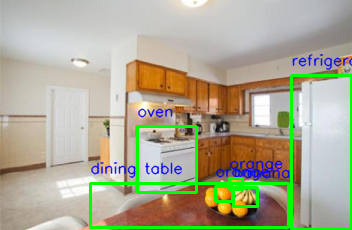

In [ ]:
cv2_imshow(igg)